In [165]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
x = np.arange(-np.pi, np.pi, .1)
sin_x = np.sin(x)
cos_x = np.cos(x)
tan_x = np.tan(x)

In [18]:
# trig_df = pd.DataFrame({"sin(x)":sin_x, "cos(x)": cos_x, "tan(x)":tan_x, "x": x})
# trig_df.set_index("x", inplace = True)
trig_df = pd.DataFrame({"sin(x)":sin_x, "cos(x)": cos_x, "tan(x)":tan_x}, index = pd.Series(x, name="x"))
trig_df.head()

,sin(x),cos(x),tan(x)
x,,,
-3.141593,-1.224647e-16,-1.000000,1.224647e-16
-3.041593,-9.983342e-02,-0.995004,1.003347e-01
-2.941593,-1.986693e-01,-0.980067,2.027100e-01
-2.841593,-2.955202e-01,-0.955336,3.093362e-01
-2.741593,-3.894183e-01,-0.921061,4.227932e-01


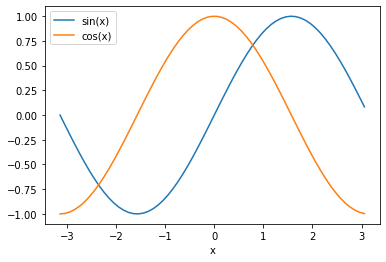

In [20]:
trig_df[["sin(x)","cos(x)"]].plot()

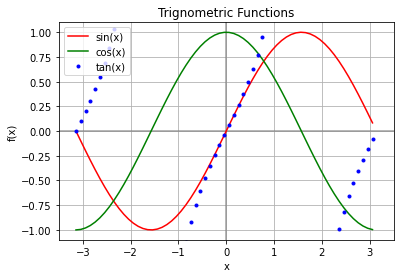

In [135]:
plt.plot(trig_df.index, trig_df["sin(x)"], label="sin(x)", color="red")
plt.plot(trig_df.index, trig_df["cos(x)"], label="cos(x)", color="green")
plt.plot(trig_df.index, trig_df["tan(x)"], label="tan(x)", color="blue", marker=".", linewidth=0)


plt.axis([-3.5, 3.5,-1.1, 1.1])

plt.hlines(0,-3.5, 3.5, alpha=.75, color="grey")
plt.vlines(0,-1.1, 1.1, alpha=.75, color="grey")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Trignometric Functions")

plt.legend(loc="upper left")
plt.grid()
plt.savefig("./trigchart.jpg")
plt.show()

In [49]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [52]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [100]:
species_df = df.groupby(["sex","species"]).mean()
species_df

bill_length_mm  bill_depth_mm  flipper_length_mm  \
sex    species                                                       
Female Adelie          37.257534      17.621918         187.794521   
       Chinstrap       46.573529      17.588235         191.735294   
       Gentoo          45.563793      14.237931         212.706897   
Male   Adelie          40.390411      19.072603         192.410959   
       Chinstrap       51.094118      19.252941         199.911765   
       Gentoo          49.473770      15.718033         221.540984   

                  body_mass_g  
sex    species                 
Female Adelie     3368.835616  
       Chinstrap  3527.205882  
       Gentoo     4679.741379  
Male   Adelie     4043.493151  
       Chinstrap  3938.970588  
       Gentoo     5484.836066

In [103]:
species_df.loc["Male"].index

Index(['Adelie', 'Chinstrap', 'Gentoo'], dtype='object', name='species')

In [64]:
species_df.mean()

bill_length_mm         45.043364
bill_depth_mm          17.249687
flipper_length_mm     200.988055
body_mass_g          4169.922249
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


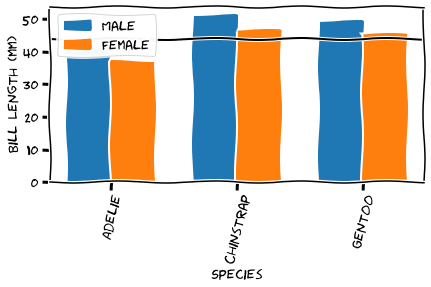

In [132]:
with plt.xkcd():
  bill_avg = df.mean()["bill_length_mm"]
  colors = ['red' if bill > bill_avg else 'blue' for bill in species_df["bill_length_mm"]]

  # plt.bar(species_df.index, species_df["bill_length_mm"], color=colors)

  labels = ["Adelie F", "Adelie M", "Chinstrap F", "Chinstrap M", "Gentoo F", "Gentoo M"]
  # plt.bar(labels, species_df["bill_length_mm"], color=colors)

  fig, ax = plt.subplots()

  x = np.arange(len(species_df.loc["Male"].index))
  width = .35

  # male   = ax.bar(species_df.loc["Male"].index, species_df.loc["Male"]["bill_length_mm"], .5, label="Male")
  # female = ax.bar(species_df.loc["Female"].index, species_df.loc["Female"]["bill_length_mm"], .5, label="Female", align="edge")

  male   = ax.bar(x - width/2, species_df.loc["Male"]["bill_length_mm"], .35, label="Male")
  female = ax.bar(x + width/2, species_df.loc["Female"]["bill_length_mm"], .35, label="Female")

  plt.axhline(bill_avg, color="black")

  ax.set_xticks(x)
  ax.set_xticklabels(['Adelie', 'Chinstrap', 'Gentoo'], rotation=75)

  fig.tight_layout()

  ax.legend()
  plt.xlabel("Species")
  plt.ylabel("Bill Length (mm)")
  plt.show()

In [138]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [140]:
df["body_mass_g"].max(), df["body_mass_g"].min()

(6300.0, 2700.0)

In [151]:
s_df = df.groupby("species").count()[["island"]].rename(columns={"island": "count"})
s_df

,count
species,
Adelie,152
Chinstrap,68
Gentoo,124


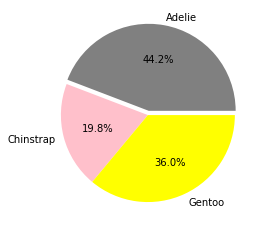

In [164]:
explode = [.05 if count == s_df["count"].max() else 0 for count in s_df["count"]]
plt.pie(s_df["count"], labels = s_df.index, autopct="%1.1f%%", explode=explode, colors=["grey", "pink", "yellow"])

plt.show()

In [171]:
latitude = 40.7128
longitude = -74.0060
url = f"https://api.weather.gov/points/{latitude},{longitude}"
forecast_url = requests.get(url).json()["properties"]["forecast"]

In [176]:
data = requests.get(forecast_url)
weather = pd.DataFrame(data.json()["properties"]["periods"])
weather.head()

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,windSpeed,windDirection,icon,shortForecast,detailedForecast
0,1,This Afternoon,2022-09-12T15:00:00-04:00,2022-09-12T18:00:00-04:00,True,82,F,None,3 mph,S,https://api.weather.gov/icons/land/day/rain_sh...,Chance Rain Showers,A chance of rain showers after 5pm. Mostly sun...
1,2,Tonight,2022-09-12T18:00:00-04:00,2022-09-13T06:00:00-04:00,False,71,F,rising,3 mph,S,"https://api.weather.gov/icons/land/night/tsra,...",Showers And Thunderstorms,"A chance of rain showers before 8pm, then show..."
2,3,Tuesday,2022-09-13T06:00:00-04:00,2022-09-13T18:00:00-04:00,True,86,F,None,2 to 10 mph,SW,"https://api.weather.gov/icons/land/day/tsra,70...",Showers And Thunderstorms Likely,"Showers and thunderstorms likely before 2pm, t..."
3,4,Tuesday Night,2022-09-13T18:00:00-04:00,2022-09-14T06:00:00-04:00,False,65,F,None,6 to 10 mph,W,https://api.weather.gov/icons/land/night/rain_...,Slight Chance Rain Showers then Mostly Clear,A slight chance of rain showers before 8pm. Mo...
4,5,Wednesday,2022-09-14T06:00:00-04:00,2022-09-14T18:00:00-04:00,True,83,F,None,8 mph,W,https://api.weather.gov/icons/land/day/few?siz...,Sunny,"Sunny, with a high near 83. West wind around 8..."


In [193]:
day_df = weather[weather["name"].isin(["Today","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])]

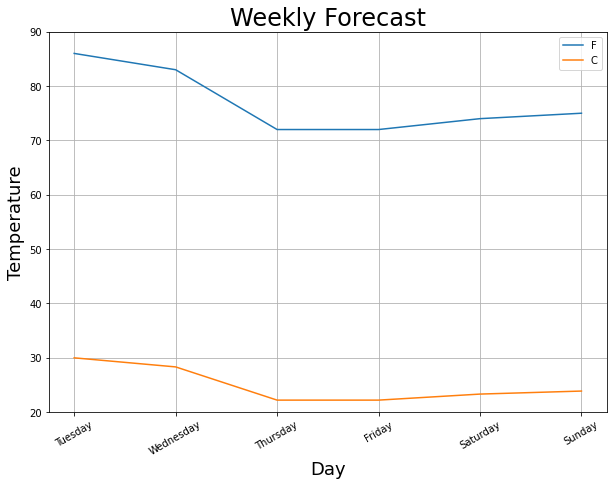

In [204]:
plt.figure(figsize=(10,7))
plt.plot(day_df["name"], day_df["temperature"], label="F")
plt.plot(day_df["name"], [(5/9) * (temp - 32) for temp in day_df["temperature"]], label = "C")

plt.ylim(20, 90)

plt.xlabel("Day", fontsize=18)
plt.ylabel("Temperature", fontsize=18)
plt.title("Weekly Forecast", fontsize=24)

plt.xticks(rotation="30")
plt.yticks()

plt.legend()
plt.grid()
plt.show()